#### DOMAIN: Telecom
• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.
• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:
• Customers who left within the last month – the column is called Churn
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents
• PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the
company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

#### STEPS AND TASK [30 Marks]:

### 1. Data Understanding & Exploration:

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
import time
# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

#### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

In [370]:
churn1 = pd.read_csv('Churn_1.csv')

In [371]:
churn1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


#### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [372]:
churn2 = pd.read_csv('Churn_2.csv')

In [373]:
churn2

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [374]:
merge_churn = pd.merge(churn1,churn2,on='customerID')

In [375]:
merge_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [376]:
churn1.columns.value_counts()

customerID         1
gender             1
SeniorCitizen      1
Partner            1
Dependents         1
tenure             1
PhoneService       1
MultipleLines      1
InternetService    1
OnlineSecurity     1
dtype: int64

In [377]:
churn2.columns.value_counts()

customerID          1
OnlineBackup        1
DeviceProtection    1
TechSupport         1
StreamingTV         1
StreamingMovies     1
Contract            1
PaperlessBilling    1
PaymentMethod       1
MonthlyCharges      1
TotalCharges        1
Churn               1
dtype: int64

In [378]:
for i in merge_churn.columns:
    if i in churn1 :
        print('column are from churn1' + i)
    if i in churn2 :
        print('column are from churn2' + i)

column are from churn1customerID
column are from churn2customerID
column are from churn1gender
column are from churn1SeniorCitizen
column are from churn1Partner
column are from churn1Dependents
column are from churn1tenure
column are from churn1PhoneService
column are from churn1MultipleLines
column are from churn1InternetService
column are from churn1OnlineSecurity
column are from churn2OnlineBackup
column are from churn2DeviceProtection
column are from churn2TechSupport
column are from churn2StreamingTV
column are from churn2StreamingMovies
column are from churn2Contract
column are from churn2PaperlessBilling
column are from churn2PaymentMethod
column are from churn2MonthlyCharges
column are from churn2TotalCharges
column are from churn2Churn


#### you can see that merge column contains all the column of churn1 data and churn2 data which is 21

### 2. Data Cleaning & Analysis:

#### A. Impute missing/unexpected values in the DataFrame

In [379]:
merge_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [380]:
merge_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### we can see there are no null values present in data set 

In [381]:
merge_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [382]:
# Converting Total Charges to a numerical data type.
merge_churn.TotalCharges = pd.to_numeric(merge_churn.TotalCharges, errors='coerce')
merge_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

In [383]:
merge_churn.dropna(inplace=True)

In [384]:
merge_churn.shape

(7032, 21)

In [385]:
#### remove customerID from our data
df2 = merge_churn.iloc[:,1:]

In [386]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [387]:
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [388]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


#### let's convert all the categorical variables into dummy variables

In [389]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


#### B. Make sure all the variables with continuous values are of ‘Float’ type.


In [390]:
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

#### Here you can see that dtype of MOnthlycharges and Totalcharges are already converted to float type

#### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentagedistribution in the pie-chart

In [391]:
# Feature SeniorCitizen is numeric categorical values. it contains 1 and 0. however, for EDA purpose let us convert the feature to categorical.
df2['SeniorCitizen']=df2['SeniorCitizen'].astype('category')


In [392]:
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts_for_CategoricalVar(df_pie,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df_pie:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df_pie[i].dtype) in ['object','category']:
            b.append(i)
        
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df_pie.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

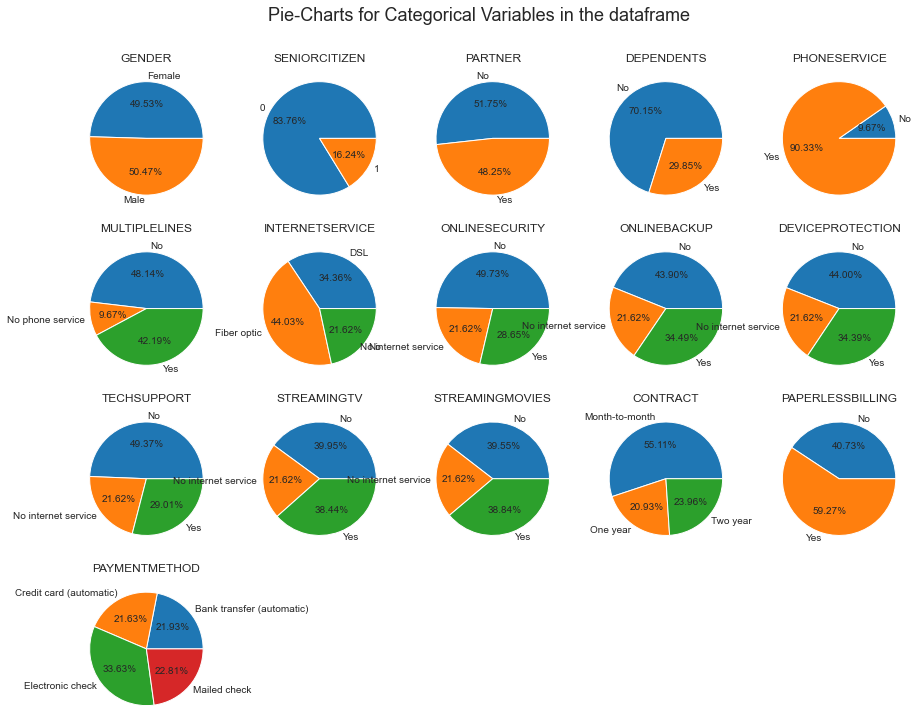

In [393]:
pie_charts_for_CategoricalVar(df2,5)

#### D Share insights for Q2.c.

In [394]:
print('Senior citizens user are very less i.e aroind 16 percent ')
print('Partner users more or less same size of count ')
print('Male and Female users are almost equal')
print('Churn count is less i.e 26 perecent it means there are still good amount of customers who are using the service')

Senior citizens user are very less i.e aroind 16 percent 
Partner users more or less same size of count 
Male and Female users are almost equal
Churn count is less i.e 26 perecent it means there are still good amount of customers who are using the service


#### E. Encode all the appropriate Categorical features with the best suitable approach

In [395]:
import category_encoders as ce
def encoder(i,data):
    encoder=ce.OneHotEncoder(cols=i,handle_unknown='return_nan',return_df=True,use_cat_names=True)
    data_encoded = encoder.fit_transform(data)
    return data_encoded
#Fit and transform Data
 
data=encoder('Partner',df2)
data=encoder('Dependents',data)
data=encoder('PhoneService',data)
data=encoder('MultipleLines',data)
data=encoder('Contract',data)
data=encoder('PaperlessBilling',data)
data=encoder('StreamingMovies',data)
data=encoder('PaymentMethod',data)
data=encoder('gender',data)
data=encoder('InternetService',data)
data=encoder('SeniorCitizen',data)
data=encoder('OnlineSecurity',data)
data=encoder('OnlineBackup',data)
data=encoder('DeviceProtection',data)
data=encoder('TechSupport',data)
data=encoder('StreamingTV',data)
data.shape
 


(7032, 47)

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7032 non-null   float64
 1   gender_Male                              7032 non-null   float64
 2   SeniorCitizen_0.0                        7032 non-null   float64
 3   SeniorCitizen_1.0                        7032 non-null   float64
 4   Partner_Yes                              7032 non-null   float64
 5   Partner_No                               7032 non-null   float64
 6   Dependents_No                            7032 non-null   float64
 7   Dependents_Yes                           7032 non-null   float64
 8   tenure                                   7032 non-null   int64  
 9   PhoneService_No                          7032 non-null   float64
 10  PhoneService_Yes                         7032 no

In [397]:
data.isnull().sum()

gender_Female                              0
gender_Male                                0
SeniorCitizen_0.0                          0
SeniorCitizen_1.0                          0
Partner_Yes                                0
Partner_No                                 0
Dependents_No                              0
Dependents_Yes                             0
tenure                                     0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No phone service             0
MultipleLines_No                           0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineSecurity_No internet service         0
OnlineBackup_Yes                           0
OnlineBackup_No                            0
OnlineBack

##### Replace partner yes with 1 and No with 0
##### Replace dependedents yes with 1 and No with 0
##### Replace PhoneService yes with 1 and No with 0
##### Replace internetservice values as DSL with 2 , Fiber optic as 1 , No as 0

#### F. Split the data into 80% train and 20% test

In [398]:
X=data.drop(['Churn'],axis=1)
y=data['Churn']

In [399]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [400]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [401]:
X_train.describe()

,gender_Female,gender_Male,SeniorCitizen_0.0,SeniorCitizen_1.0,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,tenure,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,...,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,0.493156,0.506844,0.839289,0.160711,0.480889,0.519111,0.700622,0.299378,32.335289,0.097600,...,0.211733,0.239467,0.591289,0.408711,0.338133,0.230578,0.213511,0.217778,64.697431,2275.300871
std,0.499998,0.499998,0.367297,0.367297,0.499679,0.499679,0.458026,0.458026,24.537144,0.296799,...,0.408573,0.426796,0.491639,0.491639,0.473116,0.421240,0.409822,0.412772,30.173948,2265.083247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.850000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.200000,397.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.350000,1388.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,55.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,89.900000,3767.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


#### G. Normalize/Standardize the data with the best suitable approach

In [402]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data)
data_scaled

array([[ 1.00943013, -1.00943013,  0.44032709, ..., -1.16169394,
        -0.99419409, -0.60166339],
       [-0.99065797,  0.99065797,  0.44032709, ..., -0.26087792,
        -0.17373982, -0.60166339],
       [-0.99065797,  0.99065797,  0.44032709, ..., -0.36392329,
        -0.95964911,  1.66205891],
       ...,
       [ 1.00943013, -1.00943013,  0.44032709, ..., -1.17000405,
        -0.85451414, -0.60166339],
       [-0.99065797,  0.99065797, -2.27103902, ...,  0.31916782,
        -0.87209546,  1.66205891],
       [-0.99065797,  0.99065797,  0.44032709, ...,  1.35793167,
         2.01234407, -0.60166339]])

In [403]:
print(f"Train target variable: {y_train.value_counts()}")
print(f"Train target variable: {y_test.value_counts()}")

Train target variable: 0    4130
1    1495
Name: Churn, dtype: int64
Train target variable: 0    1033
1     374
Name: Churn, dtype: int64


### 3. Model building and Improvement:

#### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [404]:
from xgboost import XGBClassifier
#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [405]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score
#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)
print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

Train Data Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4130
           1       0.90      0.85      0.88      1495

    accuracy                           0.94      5625
   macro avg       0.93      0.91      0.92      5625
weighted avg       0.94      0.94      0.94      5625

Test Data Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [406]:
#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

[Text(0.5, 16.0, 'predicted values'),
 Text(34.0, 0.5, 'real values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

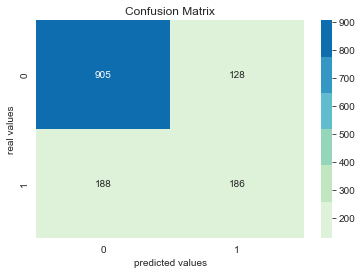

In [407]:
#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [408]:
print('Training data accuracy is 95percent and test data accuracy is 77 percent ')

Training data accuracy is 95percent and test data accuracy is 77 percent 


[0]	validation_0-logloss:0.59949	validation_1-logloss:0.62414
[1]	validation_0-logloss:0.52987	validation_1-logloss:0.57459
[2]	validation_0-logloss:0.47450	validation_1-logloss:0.53653
[3]	validation_0-logloss:0.43111	validation_1-logloss:0.50201
[4]	validation_0-logloss:0.39201	validation_1-logloss:0.47295
[5]	validation_0-logloss:0.36023	validation_1-logloss:0.45053
[6]	validation_0-logloss:0.33627	validation_1-logloss:0.43642
[7]	validation_0-logloss:0.31010	validation_1-logloss:0.41473
[8]	validation_0-logloss:0.28871	validation_1-logloss:0.39795


/Users/ashishgu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.27066	validation_1-logloss:0.38141
[10]	validation_0-logloss:0.24982	validation_1-logloss:0.36459
[11]	validation_0-logloss:0.23413	validation_1-logloss:0.35410
[12]	validation_0-logloss:0.22106	validation_1-logloss:0.34418
[13]	validation_0-logloss:0.21102	validation_1-logloss:0.33786
[14]	validation_0-logloss:0.19634	validation_1-logloss:0.32462
[15]	validation_0-logloss:0.18749	validation_1-logloss:0.31653
[16]	validation_0-logloss:0.17678	validation_1-logloss:0.31051
[17]	validation_0-logloss:0.16590	validation_1-logloss:0.30077
[18]	validation_0-logloss:0.15759	validation_1-logloss:0.29403
[19]	validation_0-logloss:0.14911	validation_1-logloss:0.28765
[20]	validation_0-logloss:0.14396	validation_1-logloss:0.28369
[21]	validation_0-logloss:0.13954	validation_1-logloss:0.28038
[22]	validation_0-logloss:0.13553	validation_1-logloss:0.27680
[23]	validation_0-logloss:0.12879	validation_1-logloss:0.27068
[24]	validation_0-logloss:0.12332	validation_1-logloss:0

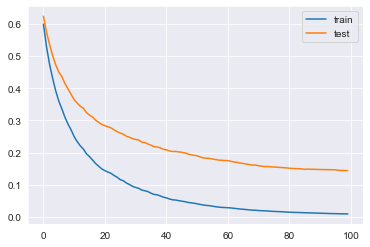

In [409]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# define the model
model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Part 1 - 3 b Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

#### We can increase the number of iterations of the algorithm via the “n_estimators” hyperparameter that defaults to 100. Let’s increase it to 500.

[0]	validation_0-logloss:0.59949	validation_1-logloss:0.62414
[1]	validation_0-logloss:0.52987	validation_1-logloss:0.57459
[2]	validation_0-logloss:0.47450	validation_1-logloss:0.53653
[3]	validation_0-logloss:0.43111	validation_1-logloss:0.50201
[4]	validation_0-logloss:0.39201	validation_1-logloss:0.47295
[5]	validation_0-logloss:0.36023	validation_1-logloss:0.45053
[6]	validation_0-logloss:0.33627	validation_1-logloss:0.43642
[7]	validation_0-logloss:0.31010	validation_1-logloss:0.41473
[8]	validation_0-logloss:0.28871	validation_1-logloss:0.39795
[9]	validation_0-logloss:0.27066	validation_1-logloss:0.38141


/Users/ashishgu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.24982	validation_1-logloss:0.36459
[11]	validation_0-logloss:0.23413	validation_1-logloss:0.35410
[12]	validation_0-logloss:0.22106	validation_1-logloss:0.34418
[13]	validation_0-logloss:0.21102	validation_1-logloss:0.33786
[14]	validation_0-logloss:0.19634	validation_1-logloss:0.32462
[15]	validation_0-logloss:0.18749	validation_1-logloss:0.31653
[16]	validation_0-logloss:0.17678	validation_1-logloss:0.31051
[17]	validation_0-logloss:0.16590	validation_1-logloss:0.30077
[18]	validation_0-logloss:0.15759	validation_1-logloss:0.29403
[19]	validation_0-logloss:0.14911	validation_1-logloss:0.28765
[20]	validation_0-logloss:0.14396	validation_1-logloss:0.28369
[21]	validation_0-logloss:0.13954	validation_1-logloss:0.28038
[22]	validation_0-logloss:0.13553	validation_1-logloss:0.27680
[23]	validation_0-logloss:0.12879	validation_1-logloss:0.27068
[24]	validation_0-logloss:0.12332	validation_1-logloss:0.26518
[25]	validation_0-logloss:0.11594	validation_1-logloss:

[140]	validation_0-logloss:0.00428	validation_1-logloss:0.13030
[141]	validation_0-logloss:0.00420	validation_1-logloss:0.13052
[142]	validation_0-logloss:0.00416	validation_1-logloss:0.13061
[143]	validation_0-logloss:0.00409	validation_1-logloss:0.13057
[144]	validation_0-logloss:0.00404	validation_1-logloss:0.13018
[145]	validation_0-logloss:0.00398	validation_1-logloss:0.13036
[146]	validation_0-logloss:0.00394	validation_1-logloss:0.13045
[147]	validation_0-logloss:0.00388	validation_1-logloss:0.13039
[148]	validation_0-logloss:0.00380	validation_1-logloss:0.12999
[149]	validation_0-logloss:0.00375	validation_1-logloss:0.12997
[150]	validation_0-logloss:0.00370	validation_1-logloss:0.12998
[151]	validation_0-logloss:0.00364	validation_1-logloss:0.12960
[152]	validation_0-logloss:0.00359	validation_1-logloss:0.12945
[153]	validation_0-logloss:0.00353	validation_1-logloss:0.12887
[154]	validation_0-logloss:0.00349	validation_1-logloss:0.12883
[155]	validation_0-logloss:0.00345	valid

[269]	validation_0-logloss:0.00144	validation_1-logloss:0.11981
[270]	validation_0-logloss:0.00143	validation_1-logloss:0.11982
[271]	validation_0-logloss:0.00143	validation_1-logloss:0.11987
[272]	validation_0-logloss:0.00142	validation_1-logloss:0.11980
[273]	validation_0-logloss:0.00141	validation_1-logloss:0.11986
[274]	validation_0-logloss:0.00140	validation_1-logloss:0.11987
[275]	validation_0-logloss:0.00140	validation_1-logloss:0.11994
[276]	validation_0-logloss:0.00139	validation_1-logloss:0.11978
[277]	validation_0-logloss:0.00138	validation_1-logloss:0.11957
[278]	validation_0-logloss:0.00138	validation_1-logloss:0.11953
[279]	validation_0-logloss:0.00137	validation_1-logloss:0.11953
[280]	validation_0-logloss:0.00137	validation_1-logloss:0.11945
[281]	validation_0-logloss:0.00136	validation_1-logloss:0.11954
[282]	validation_0-logloss:0.00136	validation_1-logloss:0.11968
[283]	validation_0-logloss:0.00135	validation_1-logloss:0.11988
[284]	validation_0-logloss:0.00134	valid

[398]	validation_0-logloss:0.00094	validation_1-logloss:0.11716
[399]	validation_0-logloss:0.00094	validation_1-logloss:0.11725
[400]	validation_0-logloss:0.00094	validation_1-logloss:0.11722
[401]	validation_0-logloss:0.00094	validation_1-logloss:0.11720
[402]	validation_0-logloss:0.00094	validation_1-logloss:0.11730
[403]	validation_0-logloss:0.00093	validation_1-logloss:0.11719
[404]	validation_0-logloss:0.00093	validation_1-logloss:0.11721
[405]	validation_0-logloss:0.00093	validation_1-logloss:0.11718
[406]	validation_0-logloss:0.00093	validation_1-logloss:0.11730
[407]	validation_0-logloss:0.00093	validation_1-logloss:0.11723
[408]	validation_0-logloss:0.00092	validation_1-logloss:0.11735
[409]	validation_0-logloss:0.00092	validation_1-logloss:0.11728
[410]	validation_0-logloss:0.00092	validation_1-logloss:0.11712
[411]	validation_0-logloss:0.00092	validation_1-logloss:0.11723
[412]	validation_0-logloss:0.00092	validation_1-logloss:0.11725
[413]	validation_0-logloss:0.00091	valid

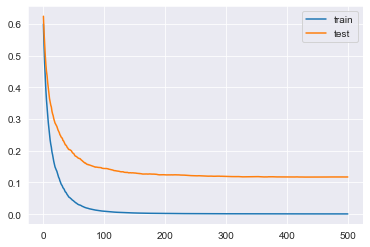

In [410]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# define the model
model = XGBClassifier(n_estimators=500)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### We can see that more iterations have resulted in a lift in accuracy from about 95.1% to about 96.9%.

#### The long flat curves may suggest that the algorithm is learning too fast and we may benefit from slowing it down.

#### This can be achieved using the learning rate, which limits the contribution of each tree added to the ensemble. This can be controlled via the “eta” hyperparameter and defaults to the value of 0.3. We can try a smaller value, such as 0.05.

[0]	validation_0-logloss:0.67533	validation_1-logloss:0.67945
[1]	validation_0-logloss:0.65881	validation_1-logloss:0.66673
[2]	validation_0-logloss:0.64340	validation_1-logloss:0.65519
[3]	validation_0-logloss:0.62862	validation_1-logloss:0.64393
[4]	validation_0-logloss:0.61476	validation_1-logloss:0.63377
[5]	validation_0-logloss:0.60147	validation_1-logloss:0.62360
[6]	validation_0-logloss:0.58820	validation_1-logloss:0.61415
[7]	validation_0-logloss:0.57628	validation_1-logloss:0.60543
[8]	validation_0-logloss:0.56518	validation_1-logloss:0.59774


/Users/ashishgu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-logloss:0.55348	validation_1-logloss:0.58915
[10]	validation_0-logloss:0.54255	validation_1-logloss:0.58143
[11]	validation_0-logloss:0.53248	validation_1-logloss:0.57369
[12]	validation_0-logloss:0.52310	validation_1-logloss:0.56712
[13]	validation_0-logloss:0.51327	validation_1-logloss:0.55977
[14]	validation_0-logloss:0.50349	validation_1-logloss:0.55212
[15]	validation_0-logloss:0.49456	validation_1-logloss:0.54574
[16]	validation_0-logloss:0.48531	validation_1-logloss:0.53875
[17]	validation_0-logloss:0.47704	validation_1-logloss:0.53270
[18]	validation_0-logloss:0.46881	validation_1-logloss:0.52656
[19]	validation_0-logloss:0.46050	validation_1-logloss:0.51998
[20]	validation_0-logloss:0.45226	validation_1-logloss:0.51423
[21]	validation_0-logloss:0.44514	validation_1-logloss:0.50925
[22]	validation_0-logloss:0.43839	validation_1-logloss:0.50466
[23]	validation_0-logloss:0.43128	validation_1-logloss:0.49932
[24]	validation_0-logloss:0.42425	validation_1-logloss:0

[139]	validation_0-logloss:0.12973	validation_1-logloss:0.26592
[140]	validation_0-logloss:0.12894	validation_1-logloss:0.26511
[141]	validation_0-logloss:0.12799	validation_1-logloss:0.26439
[142]	validation_0-logloss:0.12684	validation_1-logloss:0.26353
[143]	validation_0-logloss:0.12632	validation_1-logloss:0.26309
[144]	validation_0-logloss:0.12501	validation_1-logloss:0.26197
[145]	validation_0-logloss:0.12393	validation_1-logloss:0.26134
[146]	validation_0-logloss:0.12338	validation_1-logloss:0.26096
[147]	validation_0-logloss:0.12253	validation_1-logloss:0.26013
[148]	validation_0-logloss:0.12172	validation_1-logloss:0.25929
[149]	validation_0-logloss:0.12072	validation_1-logloss:0.25842
[150]	validation_0-logloss:0.11955	validation_1-logloss:0.25756
[151]	validation_0-logloss:0.11836	validation_1-logloss:0.25636
[152]	validation_0-logloss:0.11764	validation_1-logloss:0.25587
[153]	validation_0-logloss:0.11661	validation_1-logloss:0.25525
[154]	validation_0-logloss:0.11596	valid

[268]	validation_0-logloss:0.05441	validation_1-logloss:0.19690
[269]	validation_0-logloss:0.05414	validation_1-logloss:0.19683
[270]	validation_0-logloss:0.05398	validation_1-logloss:0.19671
[271]	validation_0-logloss:0.05380	validation_1-logloss:0.19659
[272]	validation_0-logloss:0.05339	validation_1-logloss:0.19628
[273]	validation_0-logloss:0.05319	validation_1-logloss:0.19627
[274]	validation_0-logloss:0.05270	validation_1-logloss:0.19577
[275]	validation_0-logloss:0.05239	validation_1-logloss:0.19541
[276]	validation_0-logloss:0.05194	validation_1-logloss:0.19496
[277]	validation_0-logloss:0.05178	validation_1-logloss:0.19492
[278]	validation_0-logloss:0.05154	validation_1-logloss:0.19474
[279]	validation_0-logloss:0.05111	validation_1-logloss:0.19408
[280]	validation_0-logloss:0.05089	validation_1-logloss:0.19412
[281]	validation_0-logloss:0.05059	validation_1-logloss:0.19360
[282]	validation_0-logloss:0.05040	validation_1-logloss:0.19339
[283]	validation_0-logloss:0.05021	valid

[397]	validation_0-logloss:0.02585	validation_1-logloss:0.16335
[398]	validation_0-logloss:0.02566	validation_1-logloss:0.16307
[399]	validation_0-logloss:0.02546	validation_1-logloss:0.16295
[400]	validation_0-logloss:0.02529	validation_1-logloss:0.16269
[401]	validation_0-logloss:0.02512	validation_1-logloss:0.16254
[402]	validation_0-logloss:0.02497	validation_1-logloss:0.16232
[403]	validation_0-logloss:0.02485	validation_1-logloss:0.16207
[404]	validation_0-logloss:0.02480	validation_1-logloss:0.16209
[405]	validation_0-logloss:0.02466	validation_1-logloss:0.16191
[406]	validation_0-logloss:0.02449	validation_1-logloss:0.16166
[407]	validation_0-logloss:0.02439	validation_1-logloss:0.16157
[408]	validation_0-logloss:0.02421	validation_1-logloss:0.16131
[409]	validation_0-logloss:0.02402	validation_1-logloss:0.16105
[410]	validation_0-logloss:0.02392	validation_1-logloss:0.16097
[411]	validation_0-logloss:0.02375	validation_1-logloss:0.16067
[412]	validation_0-logloss:0.02356	valid

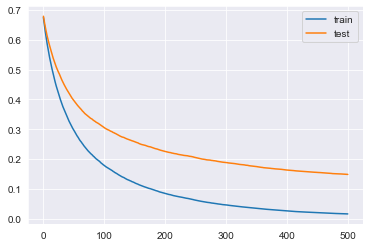

In [411]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# define the model
model = XGBClassifier(n_estimators=500, eta=0.05)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### we can similarly tune the model by changing iterations and hyperparameters to get better accuracy

## Part 2 - Build a machine learning pipeline that will run autonomously with the csv file and return bestperforming model

#### Step1: Data Collection step 

In [412]:
def preprocess_data(filepath):
    df1=pd.read_csv(file);
    return df1

In [413]:
df1=readdata('Churn_1.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [414]:
df2=readdata('Churn_2.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [415]:
merge_churn = pd.merge(churn1,churn2,on='customerID')

#### Impute missing values (you can use loops and conditions imputing missing values based on dtypes)

In [416]:
def impute_numerical(categorical_column, numerical_column):
    frames = []
    for i in list(set(df[categorical_column])):
        df_category = df[df[categorical_column]== i]
        if len(df_category) > 1:    
            df_category[numerical_column].fillna(df_category[numerical_column].mean(),inplace = True)        
        else:
            df_category[numerical_column].fillna(df[numerical_column].mean(),inplace = True)
        frames.append(df_category)    
        final_df = pd.concat(frames)
    return final_df

In [417]:
merge_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [418]:
merge_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [419]:
def to_numeric(dataset, attr_name):
    
    '''
    Performs a simple categorical to numeric attribute value transformation
    
    Parameters:
    -----------
    dataset: DataFrame
        Dataset on which to perform transformation
    attr_name: str
        Dataset attribute name to convert from nominal to numeric values
    Returns:
    --------
    DataFrame
        DataFrame of with data transformation performed
    dict
        Python dictionary of attribute name to integer mappings
    '''
    
    # Get unique entries in column
    unique_vals = dataset[attr_name].unique()
    
    # Create dict
    val_dict = {}
    for val in unique_vals:
        if not val in val_dict:
            val_dict[val] = len(val_dict)
    
    # Replace values in attr_name col as per dict
    dataset[attr_name].replace(val_dict, inplace=True)
    
    # Return dataset and value dictionary
    return dataset, val_dict

In [420]:
columns=merge_churn.columns
for i in columns:
    to_numeric(merge_churn,i)

In [421]:
#### remove customerID from our data
merge_churn = merge_churn.iloc[:,1:]

In [422]:
merge_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1.0,1,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2.0,2,1
3,1,0,1,0,3,0,0,0,1,1,1,1,0,0,1,1,2,3.0,3,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,65,1,2,0,1,1,1,1,1,1,1,0,1,295.0,6526,0
7039,0,0,0,1,21,1,2,1,0,0,1,0,1,1,1,0,3,761.0,6527,0
7040,0,0,0,1,26,0,0,0,1,1,0,0,0,0,0,0,0,204.0,6528,0
7041,1,1,0,0,54,1,2,1,0,1,0,0,0,0,0,0,1,113.0,6529,1


In [423]:
merge_churn.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
1       0              1        0           0       1             1              2                2               2             2                 2            2            2                0         1                 1              332.0           656           0        3
                                                                                                                                                                                                                                        33.0            33            0        3
                                                                                 0                0               1             0                 0            0            0             

In [424]:
merge_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [425]:
merge_churn.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.001808,0.010517,-0.000013,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.008072,-0.012302,-0.008612
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.010834,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.049649,0.023880,0.150889
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.101985,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.036054,-0.042628,0.150448
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.048514,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.029390,0.006300,-0.164221
tenure,-0.000013,0.010834,-0.101985,0.048514,1.000000,-0.018799,0.063510,-0.012008,0.017083,-0.064613,0.037174,0.033108,0.027090,0.031491,0.122446,-0.011129,0.075379,0.041647,0.108142,-0.144351
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,-0.018799,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,-0.141829,-0.029806,0.011942
MultipleLines,-0.009451,0.113791,-0.117307,-0.019657,0.063510,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.024338,0.015373,0.036310
InternetService,-0.000863,-0.032310,-0.000891,0.044590,-0.012008,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.289963,-0.038247,-0.047291
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.017083,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.220566,-0.026788,-0.332819
OnlineBackup,0.012230,-0.144828,0.090753,0.062775,-0.064613,0.129770,-0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.260715,0.003183,-0.284344,-0.054537,-0.074205


#### define train and evaluate model

In [426]:
X=merge_churn.drop(['Churn'],axis=1)
y=merge_churn['Churn']


In [427]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [428]:
print(f"Train target variable: {y_train.value_counts()}")
print(f"Test target variable: {y_test.value_counts()}")


Train target variable: 0    4138
1    1496
Name: Churn, dtype: int64
Test target variable: 0    1036
1     373
Name: Churn, dtype: int64


In [429]:
from sklearn.linear_model import LinearRegression
def linearregressionmodel():
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.intercept_)
    print(regressor.coef_)

In [430]:
def decisiontreeregressionmodal():
    dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

    dtm.fit(X,y)
    print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

    dtm.fit(X_test,y_test)   
    print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

In [431]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
def bagginregressormodel():
    model= BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    pred_train=model.predict(X_train)
    model.score(X_train, y_train)

In [432]:
def XGclassifiermodel():
    X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# define the model
    model = XGBClassifier(n_estimators=500, eta=0.05)
# define the datasets to evaluate each iteration
    evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
    model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
    yhat = model.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: %.3f' % score)

In [364]:
linearregressionmodel()

0.5036155256149943
[ 3.47291864e-02  1.65773366e-02 -1.57839960e-02 -1.88213172e-03
 -6.55870049e-02  1.91808073e-02  1.06311605e-01 -1.20865114e-01
  5.39176964e-02 -4.44257005e-02 -9.17132278e-02  9.06339769e-03
  2.71207427e-02 -9.94779077e-02 -4.93742337e-02 -3.37537005e-02
  1.20953538e-05 -3.55367016e-06]


In [365]:
decisiontreeregressionmodal()

R-Squared on train dataset=0.294732147019759
R-Squaredon test dataset=0.31927512851766315


In [368]:
XGclassifiermodel()

[0]	validation_0-logloss:0.67533	validation_1-logloss:0.67945
[1]	validation_0-logloss:0.65881	validation_1-logloss:0.66673
[2]	validation_0-logloss:0.64340	validation_1-logloss:0.65519
[3]	validation_0-logloss:0.62862	validation_1-logloss:0.64393
[4]	validation_0-logloss:0.61476	validation_1-logloss:0.63377
[5]	validation_0-logloss:0.60147	validation_1-logloss:0.62360
[6]	validation_0-logloss:0.58820	validation_1-logloss:0.61415
[7]	validation_0-logloss:0.57628	validation_1-logloss:0.60543


/Users/ashishgu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.56518	validation_1-logloss:0.59774
[9]	validation_0-logloss:0.55348	validation_1-logloss:0.58915
[10]	validation_0-logloss:0.54255	validation_1-logloss:0.58143
[11]	validation_0-logloss:0.53248	validation_1-logloss:0.57369
[12]	validation_0-logloss:0.52310	validation_1-logloss:0.56712
[13]	validation_0-logloss:0.51327	validation_1-logloss:0.55977
[14]	validation_0-logloss:0.50349	validation_1-logloss:0.55212
[15]	validation_0-logloss:0.49456	validation_1-logloss:0.54574
[16]	validation_0-logloss:0.48531	validation_1-logloss:0.53875
[17]	validation_0-logloss:0.47704	validation_1-logloss:0.53270
[18]	validation_0-logloss:0.46881	validation_1-logloss:0.52656
[19]	validation_0-logloss:0.46050	validation_1-logloss:0.51998
[20]	validation_0-logloss:0.45226	validation_1-logloss:0.51423
[21]	validation_0-logloss:0.44514	validation_1-logloss:0.50925
[22]	validation_0-logloss:0.43839	validation_1-logloss:0.50466
[23]	validation_0-logloss:0.43128	validation_1-logloss:0.

[138]	validation_0-logloss:0.13071	validation_1-logloss:0.26679
[139]	validation_0-logloss:0.12973	validation_1-logloss:0.26592
[140]	validation_0-logloss:0.12894	validation_1-logloss:0.26511
[141]	validation_0-logloss:0.12799	validation_1-logloss:0.26439
[142]	validation_0-logloss:0.12684	validation_1-logloss:0.26353
[143]	validation_0-logloss:0.12632	validation_1-logloss:0.26309
[144]	validation_0-logloss:0.12501	validation_1-logloss:0.26197
[145]	validation_0-logloss:0.12393	validation_1-logloss:0.26134
[146]	validation_0-logloss:0.12338	validation_1-logloss:0.26096
[147]	validation_0-logloss:0.12253	validation_1-logloss:0.26013
[148]	validation_0-logloss:0.12172	validation_1-logloss:0.25929
[149]	validation_0-logloss:0.12072	validation_1-logloss:0.25842
[150]	validation_0-logloss:0.11955	validation_1-logloss:0.25756
[151]	validation_0-logloss:0.11836	validation_1-logloss:0.25636
[152]	validation_0-logloss:0.11764	validation_1-logloss:0.25587
[153]	validation_0-logloss:0.11661	valid

[267]	validation_0-logloss:0.05478	validation_1-logloss:0.19735
[268]	validation_0-logloss:0.05441	validation_1-logloss:0.19690
[269]	validation_0-logloss:0.05414	validation_1-logloss:0.19683
[270]	validation_0-logloss:0.05398	validation_1-logloss:0.19671
[271]	validation_0-logloss:0.05380	validation_1-logloss:0.19659
[272]	validation_0-logloss:0.05339	validation_1-logloss:0.19628
[273]	validation_0-logloss:0.05319	validation_1-logloss:0.19627
[274]	validation_0-logloss:0.05270	validation_1-logloss:0.19577
[275]	validation_0-logloss:0.05239	validation_1-logloss:0.19541
[276]	validation_0-logloss:0.05194	validation_1-logloss:0.19496
[277]	validation_0-logloss:0.05178	validation_1-logloss:0.19492
[278]	validation_0-logloss:0.05154	validation_1-logloss:0.19474
[279]	validation_0-logloss:0.05111	validation_1-logloss:0.19408
[280]	validation_0-logloss:0.05089	validation_1-logloss:0.19412
[281]	validation_0-logloss:0.05059	validation_1-logloss:0.19360
[282]	validation_0-logloss:0.05040	valid

[396]	validation_0-logloss:0.02606	validation_1-logloss:0.16366
[397]	validation_0-logloss:0.02585	validation_1-logloss:0.16335
[398]	validation_0-logloss:0.02566	validation_1-logloss:0.16307
[399]	validation_0-logloss:0.02546	validation_1-logloss:0.16295
[400]	validation_0-logloss:0.02529	validation_1-logloss:0.16269
[401]	validation_0-logloss:0.02512	validation_1-logloss:0.16254
[402]	validation_0-logloss:0.02497	validation_1-logloss:0.16232
[403]	validation_0-logloss:0.02485	validation_1-logloss:0.16207
[404]	validation_0-logloss:0.02480	validation_1-logloss:0.16209
[405]	validation_0-logloss:0.02466	validation_1-logloss:0.16191
[406]	validation_0-logloss:0.02449	validation_1-logloss:0.16166
[407]	validation_0-logloss:0.02439	validation_1-logloss:0.16157
[408]	validation_0-logloss:0.02421	validation_1-logloss:0.16131
[409]	validation_0-logloss:0.02402	validation_1-logloss:0.16105
[410]	validation_0-logloss:0.02392	validation_1-logloss:0.16097
[411]	validation_0-logloss:0.02375	valid

#### I defined all the functions for different models and call each model to calculate accuracy

#### from above calculation you can see that XGBoost is the best algorithmic model with maxmimum accuracy

#### ML pipeline workflow defines various steps as data collection , exploratory data analysis , data preparation, data cleaning and normalization

#### train and test model